<a href="https://colab.research.google.com/github/johanhoffman/DD2363_VT22/blob/main/template-report-lab-X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 5: Integartion**
**Marc Hétier**

# **Abstract**

On this lab, we implemented some function to approximate integrals. The two first problems will be dedicated to approximation using interpolation, and the two following will use Monte Carlo method.

In [1]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2020 Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2365 Advanced Computation in Fluid Mechanics
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 

In [83]:
# Load neccessary modules.
from google.colab import files

import numpy as np
from matplotlib import pyplot as plt

# **Introduction**

Given a function $f$ define over a domain $\Omega$, we want to compute $\int_\Omega f(x)dx$. However, even if the function $f$ is known implicitly, we are often condemn to compute an approximation of it. Two typesmethods are envisageable. The first one is based on interpolation of the function $f$ on some chosen points $(x_i)_i$. We then compute :
$$ \int_\Omega f(x) dx \simeq \sum_{i=1}^N w_i f(x_i) $$

The accuracy of the approximation depends on the number of point used, and on their repartition.

An other method consists to use stochasticity. We sample $n$ points $(x_i)_i$ over the domain $\Omega$, uniformly, and we then approximate 
$$ \int_\Omega f(x) dx \simeq \dfrac{\vert \Omega \vert}{n} \sum_{i=1}^n f(x_i)$$
This method is known as Monte Carlo method.

# **Method**

## Problem 1 : 2-points Gauss quadrature over a unit interval
This method is of first type. We assume that $\Omega = [0,1]$ and we search two points $(x_0, x_1)$, and two associated wheight $(w_0, w_1)$ such that the approximation is exact for polynomial of degree 3. According to the computations made on Problem assignement, we should take $$ \left\lbrace\begin{array}{l} w_0 = w_1 = 0.5 \\ x_0 = \frac{1+\sqrt{3}}{2\sqrt{3}} \\ x_1 = \frac{-1+\sqrt{3}}{2\sqrt{3}} \end{array} \right. $$


In [3]:
def UI_2points(f):
    """
    Input : a function f we want to approximate its integral over [0,1]
    Output 2-points Gauss quadrature
    """
    x_0 = (1+np.sqrt(3))/(2*np.sqrt(3))
    x_1 = (-1+np.sqrt(3))/(2*np.sqrt(3))
    return 1/2 * (f(x_0) + f(x_1))


## Problem 2 : 3-points edge midpoint quadrature over the unit triangle
As before, this method is of first type, but now we assume that $\Omega = \{(x,y) | \; x \geq 0, \; y\geq 0, \; x+y \leq 1\} $. We search 3 points and wheight $(x^0, x^1, x^2)$ and $(w^0, w^1, w^2)$ such that the approximation is exact for quadratic polynomials.
Note that quadratic polynomials are generated by the following 6 functions :
$$ \phi_0(x) = 1 \;\; \phi_1(x) = x_1 \;\; \phi_2(x) = x_2 \;\; \phi_3(x) = x_1x_2 \;\; \phi_4(x) = x_1^2 \;\; \phi_5(x) = x_2^2$$
where $x=(x_1, x_2)$.

Using the equality between the sum $$\forall j=0,\ldots 5 \sum_{i=0}^2 w^i \phi_j(x^i)$$ and integral $$\int_\Omega \phi_j(x) dx$$ we obtain the follwoing set of equations :
$$ \left\lbrace\begin{array}{l} w^0 + w^1 + w^2 = 0.5 \\ w^0x^0_k+w^1x^1_k + w^2x^2_k = 1/6 \;\; k =1,2 \\ w^0(x^0_k)^2+w^1(x^1_k)^2 + w^2(x^2_k)^2 = 1/12 \;\; k =1,2 \\ w^0x^0_1x^0_2+w^1x^1_1 x^1_2 + w^2x^2_1x^2_2 = 1/24 \end{array} \right. $$

We can notice, using symmetry, that $w_0 = w_1 = w_2 = 1/6$ and $x_0 = (1/2, 0)$, $x_1 = (0,1/2)$, $x_2 = (1/2,1/2)$ staisfy the equations. We will use them to implement the approxiamtion :

In [39]:
def UT_3points(f):
    """
    Input : a function f we want to approximate its integral over the unit triangle
    Output 3-points Gauss quadrature
    """
    x_0, x_1, x_2 = (0.5, 0), (0,0.5), (0.5, 0.5)
    return 1/6 * (f(x_0[0], x_0[1]) + f(x_1[0], x_1[1]) + f(x_2[0], x_2[1]))

## Problem 3 : Monte Carlo quadrature over a unit interval
This method is of Monte Carlo type. It is based on the follwoing observation : if $U$ is a uniform random variable over $ \Omega = [0,1]$, then $f\circ U$ is also a random variable, and its expected value is :
$$ \mathbb{E}(f\circ U) = \int_\Omega f(x)dx $$
Then, to approximate the integral of $f$, we can search an approximation of the expected value of $f\circ U$. And the law of large number gives us this approximation. Indeed, we know that :
$$ \frac{|\Omega|}{n} \sum_{i=1}^n f(u_i) \underset{n \rightarrow +\infty}{\rightarrow} \mathbb{E}(f\circ U) $$ 
where $u_i$ are sample of $U$. Moreover, this convergence is done at rate $\sqrt{n}$.

Note that for $\Omega = [0,1]$, $\vert \Omega \vert = 1$ and we can use basic uniform random variable to get our points. 

In [5]:
def UI_MC(f, n):
    """
    Input : a function f we want to approximate its integral over the unit interval,
            a number of point to use
    Output : Monte Carlo quadrature using n points
    """
    u = np.random.random(n)
    rslt = 0
    for u_i in u:
        rslt += f(u_i)
    return 1/n * rslt


## Problem 4 : Monte Carlo quadrature over the reference triangle

As in problem 3, we use a Monte Carlo method but this time over the reference triangle : $\Omega = = \{(x,y) | \; x \geq 0, \; y\geq 0, \; x+y \leq 1\} $. Note that now $|\Omega| = 1/2$ and that it is more complicated than before to obtain uniform sample over $\Omega$. We can not only take $x_1$ uniformly over $I = [0,1]$ and $x_2$ uniformly over $I(x_1) = [0, 1-x_1]$ because $x_2$ will be correlated to $x_1$. We are obliged to use barycentric coordinate, which is done in function *uniform_sample_triangle*.

In [74]:
def uniform_sample_triangle(v1, v2, v3, n):
    """
    Input : 3 vertices of the triangle, the number of sample we want
    Ouput : list of n uniform sample inside the triangle  
    """
    sample = []
    for _ in range(n):
        s, t = sorted([np.random.random(), np.random.random()])
        x, y, z = s, t - s, 1 - t
        sample.append((x*v1[0] + y*v2[0] + z*v3[0], x*v1[1] + y*v2[1] + z*v3[1]))
    return sample


def UT_MC(f, n):
    """
    Input : a function f we want to approximate its integral over the unit interval,
            a number of point to use
    Output : Monte Carlo quadrature using n points
    """
    u = uniform_sample_triangle((0,0), (1,0),(0,1), n)
    rslt = 0
    for u_i in u:
        rslt += f(u_i[0], u_i[1])
    return 1/(2*n) * rslt

# **Results**

To test our functions, we will define two functions, let introduce the function $$f(x) = 1/2 x^3 + 4x +1$$ and $$g(x, y) = x^2 + y +1$$
We know that the integral of $f$ (respcetively of $g$) over the unit interval (unit tirangle) is equal at $3.125$ ($0.75$). Moreover, the Gauss-quadrature result should exact on those functions, and we will check that the convergence rate for Monte Carlo method is equal at $1/\sqrt n$ (slope of 1/2 in log-log scale)

In [78]:
f = lambda x:1/2*x**3 + 4*x + 1
g = lambda x,y:x**2 + y + 1

print("Difference for Problem 1 : ", abs(3.125 - UI_2points(f)))
print("Difference for Problem 2 : ", abs(0.75 - UT_3points(g)))

Difference for Problem 1 :  0.0
Difference for Problem 2 :  0.0


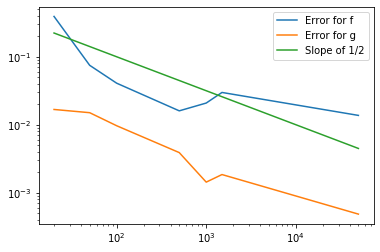

In [82]:
n_tab = [20,50,100,500,1000,1500,50000]
error_f = []
error_g = []
ref = []
for n in n_tab:
    error_f.append(abs(3.125 - UI_MC(f, n)))
    error_g.append(abs(0.75 - UT_MC(g, n)))
    ref.append(1/np.sqrt(n))

plt.loglog(n_tab, error_f)
plt.loglog(n_tab, error_g)
plt.loglog(n_tab, ref)
plt.legend(("Error for f", "Error for g", "Slope of 1/2"))


We can see that all our approximations work as expected !